# Trabalho 03 - Resistência dos Materiais MAC015 - Turma X 2024.3
___

- Ana Beatriz Lana Maciel Moreira Armond (202165501B)
- Gabriella Cruz e Silva (202165512B)

In [ ]:
# Importando Bibliotecas
import numpy as np

# Atividade 03
___

O eixo $AB$ consiste em $n$ elementos cilíndricos homogêneos, que podem ser cheios ou vazados.
Sua extremidade $A$ é engastada, enquanto a extremidade $B$ é livre, e está submetido ao carregamento mostrado na Figura 5. O comprimento do elemento $i$ é designado por $L_i$, seu diâmetro externo por $OD_i$, seu diâmetro interno por $ID_i$, seu módulo de elasticidade transversal por $G_i$, e o torque aplicado à extremidade direita por $T_i$, sendo que a intensidade $T_i$ desse torque
é considerada positiva se $T_i$ estiver no sentido anti-horário quando se observa a barra da extremidade $B$, e negativa em caso contrário. (Note que $ID_i = 0$ se o elemento for cheio).
Elabore um programa de computador que possa ser utilizado para determinar a tensão de cisalhamento máxima em cada elemento, o ângulo de torção de cada elemento e o ângulo de torção do eixo inteiro.

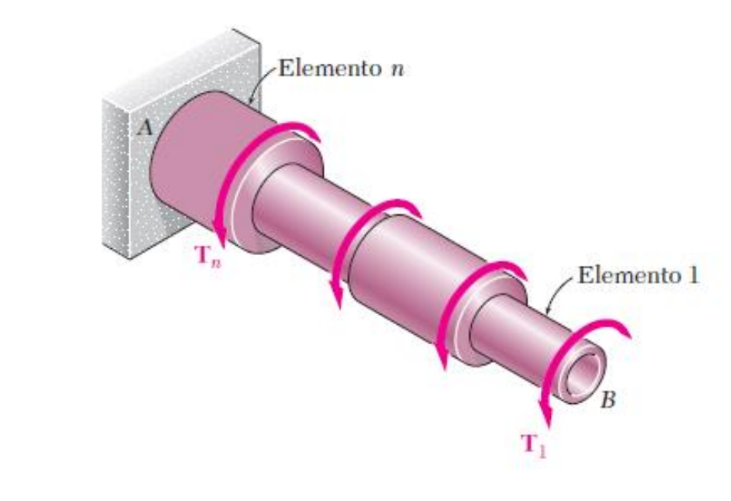

# Relatório da Atividade

### Fórmulas Utilizadas:

1. **Momento Polar de Inércia** $ (J) $:
   $
   J = \frac{\pi}{32} (D_o^4 - D_i^4)
   $

   Onde $ D_o $ é o diâmetro externo e $ D_i $ é o diâmetro interno do cilindro.

2. **Tensão de Cisalhamento Máxima** $ (\tau_{\text{max}}) $:
   $
   \tau_{\text{max}} = \frac{T \cdot R_o}{J}
   $

   Onde $ T $ é o torque aplicado e $ R_o $ é o raio externo do cilindro.

3. **Ângulo de Torção** $ (\theta) $:
   $
   \theta = \frac{T \cdot L}{G \cdot J}
   $

   Onde $ L $ é o comprimento do cilindro, $ G $ é o módulo de elasticidade transversal, e $ J $ é o momento polar de inércia.

## Bibliotecas Utilizadas

- **NumPy**: utilizada para operações matemáticas como exponenciação, multiplicação e conversão entre unidades (radianos e graus).


## Estrutura do Código

### Classes:

 **Classe `Cylinder`**:
   Representa um segmento cilíndrico de um eixo, permitindo calcular características como o momento polar de inércia, a tensão de cisalhamento máxima e o ângulo de torção. Os principais métodos dessa classe são:
   - `__init__()`: Inicializa os atributos do cilindro, como comprimento, diâmetros, módulo de elasticidade e torque.
   - `max_shear_stress()`: Calcula a tensão de cisalhamento máxima usando a fórmula \( \tau_{\text{max}} = \frac{T \cdot R_o}{J} \).
   - `torsion_angle()`: Calcula o ângulo de torção do segmento usando a fórmula \( \theta = \frac{T \cdot L}{G \cdot J} \).
   - `__repr__()`: Fornece uma representação textual do cilindro, incluindo informações detalhadas sobre suas propriedades e resultados dos cálculos.

**Classe `CylinderSystem`**:
   Representa um sistema de eixos compostos por múltiplos segmentos cilíndricos. Essa classe permite adicionar segmentos e calcular o ângulo de torção total do sistema.
   - `__init__()`: Inicializa uma lista para armazenar os segmentos do sistema.
   - `add_segment()`: Adiciona um segmento de cilindro ao sistema.
   - `total_torsion_angle()`: Calcula o ângulo total de torção do sistema, somando os ângulos de torção de cada segmento.
   - `__repr__()`: Retorna uma representação textual de todo o sistema de eixos, incluindo informações sobre os segmentos e o ângulo total de torção.

## Funcionamento Geral e Observações

O código modela um sistema de eixos composto por vários segmentos cilíndricos. Para cada segmento, os parâmetros como diâmetro, comprimento, módulo de elasticidade e torque aplicado são fornecidos, e com esses dados, o código calcula o momento polar de inércia, a tensão de cisalhamento máxima e o ângulo de torção.

O sistema permite a inclusão de múltiplos segmentos de cilindro, com cada segmento podendo ter diferentes propriedades geométricas e materiais.


In [ ]:
# Classe que representa um segmento cilíndrico do eixo, podendo ser sólido ou oco
class Cylinder:
    def __init__(self, label, length, outer_diameter, inner_diameter, shear_modulus, torque):
        self.label = label                      # Rótulo do cilindro
        self.length = length                    # Comprimento L (m)
        self.outer_diameter = outer_diameter    # Diâmetro Externo DO (m)
        self.inner_diameter = inner_diameter    # Diâmetro Interno DI (m)
        self.shear_modulus = shear_modulus      # Módulo de elasticidade transversal G (Pa)
        self.torque = torque                    # Torque aplicado T (Nm)

        # Calcula raio externo
        self.outer_radius = outer_diameter / 2

        # Calcula o Momento Polar de Inércia (J)
        self.polar_moment_of_inertia = (np.pi / 32) * (outer_diameter**4 - inner_diameter**4)

    # Retorna a tensão de cisalhamento máxima (Pa) do segmento
    def max_shear_stress(self):
        return (self.torque * self.outer_radius) / self.polar_moment_of_inertia

    # Retorna o ângulo de torção (radianos) do segmento
    def torsion_angle(self):
        return (self.torque * self.length) / (self.shear_modulus * self.polar_moment_of_inertia)

    # Retorna uma representação textual do segmento do eixo
    def __repr__(self):
        torsion_rad = self.torsion_angle()
        torsion_deg = np.degrees(torsion_rad)
        return (f"--------------------\n"
                f"Cilindro {self.label}:\n"
                f"Comprimento = {self.length:.3f} m\n"
                f"Diâmetro Externo = {self.outer_diameter:.3f} m\n"
                f"Diâmetro Interno = {self.inner_diameter:.3f} m\n"
                f"Módulo de Elasticidade Transversal = {self.shear_modulus:.1e} Pa\n"
                f"Torque = {self.torque:.1f} Nm\n"
                f"Tensão de Cisalhamento Máxima = {self.max_shear_stress():.2e} Pa\n"
                f"Ângulo de Torção = {torsion_rad:.2e} rad ou {torsion_deg:.2e} graus\n")

# Classe que representa um eixo composto por múltiplos segmentos cilíndricos
class CylinderSystem:
    def __init__(self):
        self.segments = []

    # Adiciona um segmento ao eixo
    def add_segment(self, segment):
        self.segments.append(segment)

    # Retorna o ângulo total de torção (radianos) do eixo
    def total_torsion_angle(self):
        return sum(segment.torsion_angle() for segment in self.segments)

    # Retorna uma representação textual do eixo completo
    def __repr__(self):
        segment_info = "".join(repr(segment) for segment in self.segments)
        total_torsion_rad = self.total_torsion_angle()
        total_torsion_deg = np.degrees(total_torsion_rad)
        return (f"====================\n"
                f"Sistema com {len(self.segments)} segmentos:\n"
                f"{segment_info}"
                f"--------------------\n"
                f"Ângulo de Torção Total = {total_torsion_rad:.2e} rad ou {total_torsion_deg:.2e} graus\n"
                f"====================")

___

# Exemplo 01

A barra de alumínio $AB (G = 27 GPa)$ está ligada à barra de latão $BD (G = 39 GPa)$. Sabendo que a parte $CD$ da barra
de latão é vazada e tem um diâmetro interno de $40 mm$, determine o ângulo de torção em $A$.

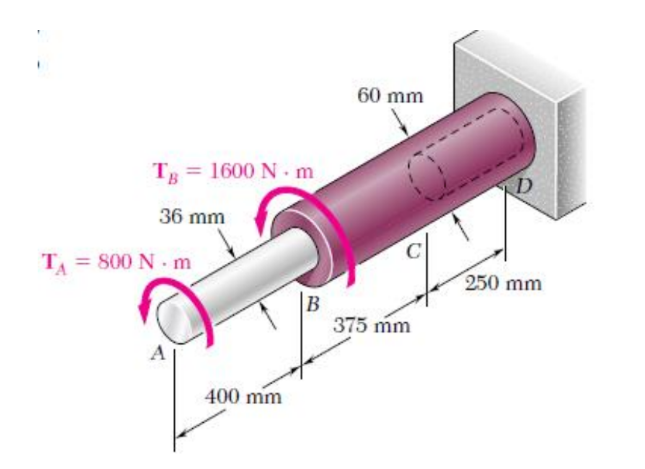

In [ ]:
# Criar segmentos do eixo

# Segmento BD (dividido em dois)
segmentCD = Cylinder(label='CD', length=0.25, outer_diameter=0.06, inner_diameter=0.04, shear_modulus=39e9, torque=1600+800) # Eixo Vazado
segmentBC = Cylinder(label='BC', length=0.375, outer_diameter=0.06, inner_diameter=0.0, shear_modulus=39e9, torque=1600+800)  # Eixo sólido
# Segmento AB
segmentAB = Cylinder(label='AB', length=0.4, outer_diameter=0.036, inner_diameter=0.0, shear_modulus=27e9, torque=800)

# Criar o eixo e adicionar os segmentos
cylinders_system = CylinderSystem()
cylinders_system.add_segment(segmentCD)
cylinders_system.add_segment(segmentBC)
cylinders_system.add_segment(segmentAB)

# Exibir resultados automaticamente usando __repr__
print(cylinders_system)

Sistema com 3 segmentos:
--------------------
Cilindro CD:
Comprimento = 0.250 m
Diâmetro Externo = 0.060 m
Diâmetro Interno = 0.040 m
Módulo de Elasticidade Transversal = 3.9e+10 Pa
Torque = 2400.0 Nm
Tensão de Cisalhamento Máxima = 7.05e+07 Pa
Ângulo de Torção = 1.51e-02 rad ou 8.63e-01 graus
--------------------
Cilindro BC:
Comprimento = 0.375 m
Diâmetro Externo = 0.060 m
Diâmetro Interno = 0.000 m
Módulo de Elasticidade Transversal = 3.9e+10 Pa
Torque = 2400.0 Nm
Tensão de Cisalhamento Máxima = 5.66e+07 Pa
Ângulo de Torção = 1.81e-02 rad ou 1.04e+00 graus
--------------------
Cilindro AB:
Comprimento = 0.400 m
Diâmetro Externo = 0.036 m
Diâmetro Interno = 0.000 m
Módulo de Elasticidade Transversal = 2.7e+10 Pa
Torque = 800.0 Nm
Tensão de Cisalhamento Máxima = 8.73e+07 Pa
Ângulo de Torção = 7.19e-02 rad ou 4.12e+00 graus
--------------------
Ângulo de Torção Total = 1.05e-01 rad ou 6.02e+00 graus


___
# Exemplo 02

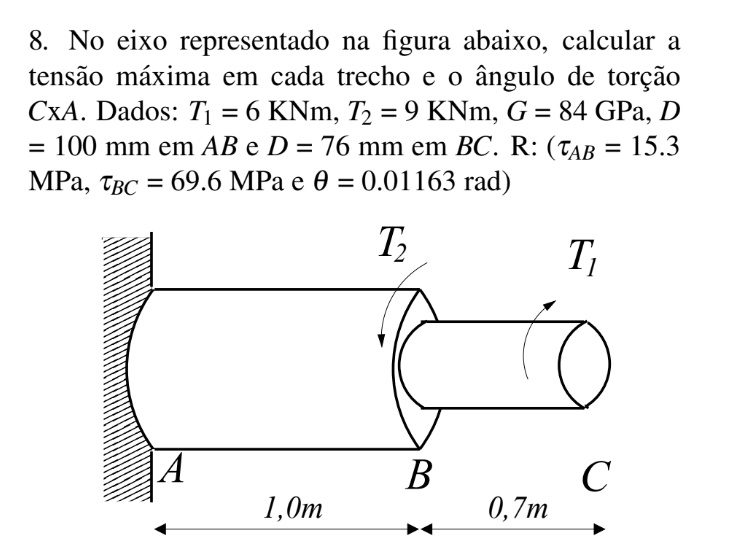

In [ ]:
# Criar segmentos do eixo

# Segmento AB
segmentAB = Cylinder(label='AB', length=1, outer_diameter=0.1, inner_diameter=0.0, shear_modulus=84e9, torque=9000-6000)
# Segmento BC
segmentBC = Cylinder(label='BC', length=0.7, outer_diameter=0.076, inner_diameter=0.0, shear_modulus=84e9, torque=-6000)

# Criar o eixo e adicionar os segmentos
cylinders_system = CylinderSystem()
cylinders_system.add_segment(segmentAB)
cylinders_system.add_segment(segmentBC)

# Exibir resultados automaticamente usando __repr__
print(cylinders_system)

Sistema com 2 segmentos:
--------------------
Cilindro AB:
Comprimento = 1.000 m
Diâmetro Externo = 0.100 m
Diâmetro Interno = 0.000 m
Módulo de Elasticidade Transversal = 8.4e+10 Pa
Torque = 3000.0 Nm
Tensão de Cisalhamento Máxima = 1.53e+07 Pa
Ângulo de Torção = 3.64e-03 rad ou 2.08e-01 graus
--------------------
Cilindro BC:
Comprimento = 0.700 m
Diâmetro Externo = 0.076 m
Diâmetro Interno = 0.000 m
Módulo de Elasticidade Transversal = 8.4e+10 Pa
Torque = -6000.0 Nm
Tensão de Cisalhamento Máxima = -6.96e+07 Pa
Ângulo de Torção = -1.53e-02 rad ou -8.75e-01 graus
--------------------
Ângulo de Torção Total = -1.16e-02 rad ou -6.66e-01 graus


___
# Exemplo 03

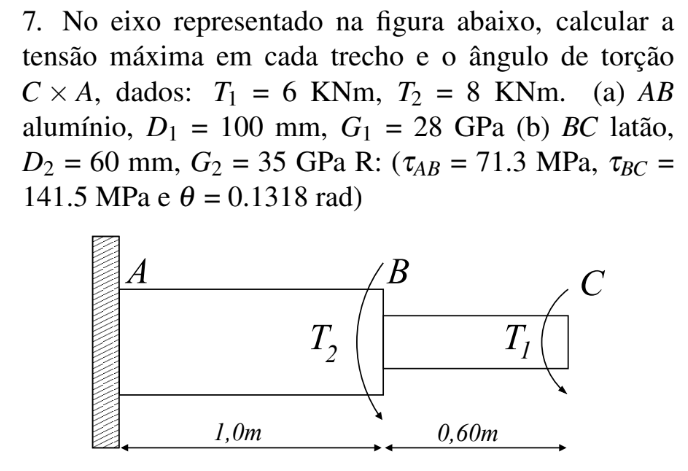

In [ ]:
# Criar segmentos do eixo

# Segmento AB
segmentAB = Cylinder(label='AB', length=1, outer_diameter=0.1, inner_diameter=0.0, shear_modulus=28e9, torque=8000+6000)
# Segmento BC
segmentBC = Cylinder(label='BC', length=0.6, outer_diameter=0.060, inner_diameter=0.0, shear_modulus=35e9, torque=6000)

# Criar o eixo e adicionar os segmentos
cylinders_system = CylinderSystem()
cylinders_system.add_segment(segmentAB)
cylinders_system.add_segment(segmentBC)

# Exibir resultados automaticamente usando __repr__
print(cylinders_system)

Sistema com 2 segmentos:
--------------------
Cilindro AB:
Comprimento = 1.000 m
Diâmetro Externo = 0.100 m
Diâmetro Interno = 0.000 m
Módulo de Elasticidade Transversal = 2.8e+10 Pa
Torque = 14000.0 Nm
Tensão de Cisalhamento Máxima = 7.13e+07 Pa
Ângulo de Torção = 5.09e-02 rad ou 2.92e+00 graus
--------------------
Cilindro BC:
Comprimento = 0.600 m
Diâmetro Externo = 0.060 m
Diâmetro Interno = 0.000 m
Módulo de Elasticidade Transversal = 3.5e+10 Pa
Torque = 6000.0 Nm
Tensão de Cisalhamento Máxima = 1.41e+08 Pa
Ângulo de Torção = 8.08e-02 rad ou 4.63e+00 graus
--------------------
Ângulo de Torção Total = 1.32e-01 rad ou 7.55e+00 graus
